## Understanding the Business Problem

This project revolves around solving a real-world problem for financial institutions: **How can we accurately and automatically predict the credit score category of a customer?**

As per the given business problem, the focus is on predicting whether a person’s credit score is **Poor**, **Standard**, or **Good**, using a variety of features such as financial status, past payment behavior, loan history, and other behavioral factors.

The four main points from the problem slide were:

1. **Understand and classify customer credit score categories** — To build a system that can classify credit scores based on existing data.
2. **Use data insights to understand financial behavior** — To identify which factors (like loan count, delays, EMIs) drive credit scoring.
3. **Develop a predictive machine learning model** — That can automate and optimize this decision-making process.
4. **Support smarter lending strategies** — So that financial institutions can reduce risk and offer suitable products based on customer profiles.

In this project, we need to work towards building a machine learning pipeline that not only predicts credit score categories but also explains which factors are most important in influencing those predictions.


In [1]:
# Importing some required and necessary modules
# for data handling
import pandas as pd
import numpy as np
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a default plot style for all charts for EDA
sns.set(style="whitegrid")


In [2]:
# Loadung the dataset
df = pd.read_csv('dataset.csv')

In [3]:
# GLancing at the dataset by displaying the first 5 and bottom 5 rows of the dataset
print("=== Head ===")
print(df.head())
print("\n=== Tail ===")
print(df.tail())


=== Head ===
     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_Hi

In [4]:
# checking the number of rows and columns & names of columns
print(f"\nDataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("Columns:", list(df.columns))


Dataset shape: 100000 rows, 28 columns
Columns: ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [5]:
#  checking data types & non-null counts
print("\n=== Info ===")
df.info()


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              10000

In [6]:
# Basic descriptive stats for numeric cols
print("\n=== Numeric summary ===")
print(df.describe().T)


=== Numeric summary ===
                             count          mean           std           min  \
ID                        100000.0  8.063150e+04  4.330149e+04   5634.000000   
Customer_ID               100000.0  2.598267e+04  1.434054e+04   1006.000000   
Month                     100000.0  4.500000e+00  2.291299e+00      1.000000   
Age                       100000.0  3.331634e+01  1.076481e+01     14.000000   
SSN                       100000.0  5.004617e+08  2.908267e+08  81349.000000   
Annual_Income             100000.0  5.050512e+04  3.829942e+04   7005.930000   
Monthly_Inhand_Salary     100000.0  4.197271e+03  3.186432e+03    303.645417   
Num_Bank_Accounts         100000.0  5.368820e+00  2.593314e+00      0.000000   
Num_Credit_Card           100000.0  5.533570e+00  2.067098e+00      0.000000   
Interest_Rate             100000.0  1.453208e+01  8.741330e+00      1.000000   
Num_of_Loan               100000.0  3.532880e+00  2.446356e+00      0.000000   
Delay_from_due_

In [7]:
# checking the count of duplicates
dup_count = df.duplicated().sum()
print(f"\nDuplicate rows: {dup_count}")


Duplicate rows: 0


In [8]:
# Missing/null value check
null_counts = df.isnull().sum()
print("\n=== Missing values per column ===")
print(null_counts[null_counts > 0])


=== Missing values per column ===
Series([], dtype: int64)


In [9]:
# Quick look at unique-value counts (to spot possible target cols)
print("\n=== Unique values per column ===")
print(df.nunique())


=== Unique values per column ===
ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score         

In [10]:
# Exploring the target column
print("Unique values in Credit_Score:\n")
print(df['Credit_Score'].value_counts())


Unique values in Credit_Score:

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


In [11]:
# Categorizing column types
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:\n", numerical_cols)
print("\nCategorical Columns:\n", categorical_cols)


Numerical Columns:
 ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

Categorical Columns:
 ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [12]:
# looking into the categorical features
for col in categorical_cols:
    print(f"\n{col} - Unique Values:")
    print(df[col].value_counts())



Name - Unique Values:
Name
Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: count, Length: 10128, dtype: int64

Occupation - Unique Values:
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

Type_of_Loan - Unique Values:
Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                               

In [13]:
# Dropping the columns which aren't useful
df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1, inplace=True)


In [14]:
# Removing any accidental whitespace in strings
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


C:\Users\Dell\AppData\Local\Temp\ipykernel_2712\2909504412.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [15]:
# Checking Type_of_loan example and their counts
print("Example Type_of_Loan entry:\n", df['Type_of_Loan'].iloc[0])
print("\nTop 10 common loan combinations:\n")
print(df['Type_of_Loan'].value_counts().head(10))


Example Type_of_Loan entry:
 Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan

Top 10 common loan combinations:

Type_of_Loan
No Data                    11408
Not Specified               1408
Credit-Builder Loan         1280
Personal Loan               1272
Debt Consolidation Loan     1264
Student Loan                1240
Payday Loan                 1200
Mortgage Loan               1176
Auto Loan                   1152
Home Equity Loan            1136
Name: count, dtype: int64


In [16]:
# Multi-label binarization for Type_of_Loan
# to turn it into a set of features like auto loan, none, home equity loan, etc
from sklearn.preprocessing import MultiLabelBinarizer

# Replacing problematic strings
df['Type_of_Loan'] = df['Type_of_Loan'].replace(['No Data', 'Not Specified'], 'None')

# Splitting loan types by comma and stripping whitespace
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: [i.strip() for i in x.replace(' and', ',').split(',')])

# Applying MultiLabelBinarizer
mlb = MultiLabelBinarizer()
loan_dummies = pd.DataFrame(mlb.fit_transform(df['Type_of_Loan']), columns=mlb.classes_, index=df.index)

# Dropping original column and merging new binary columns
df.drop('Type_of_Loan', axis=1, inplace=True)
df = pd.concat([df, loan_dummies], axis=1)
    

In [17]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,None,Not Specified,Payday Loan,Personal Loan,Student Loan
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1,1,0,1,0,0,0,0,1,0
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,1,1,0,1,0,0,0,0,1,0


In [18]:
#  EDA Charts

In [19]:
# Univariate Charts

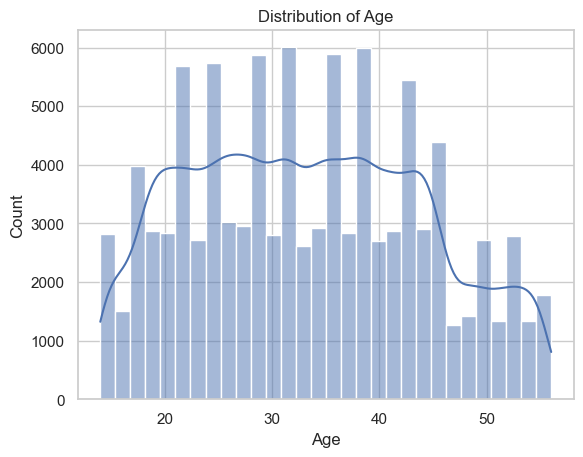

In [20]:
# Chart 1. Age distribution
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

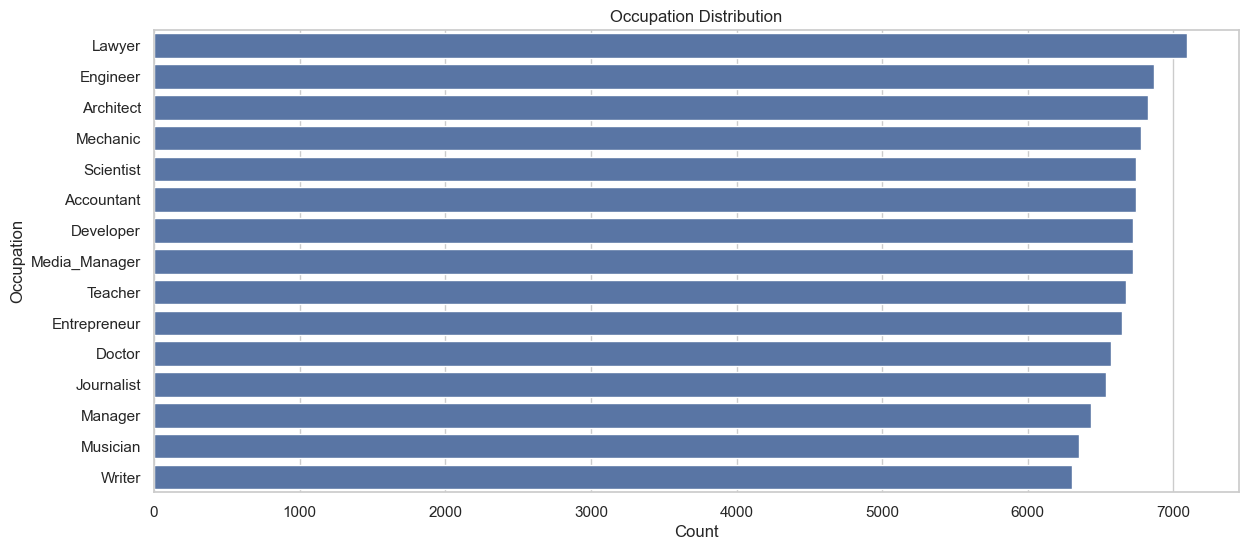

In [21]:
# Chart 2. Count of Occupation
plt.figure(figsize=(14, 6))
sns.countplot(y='Occupation', data=df, order=df['Occupation'].value_counts().index)
plt.title("Occupation Distribution")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()

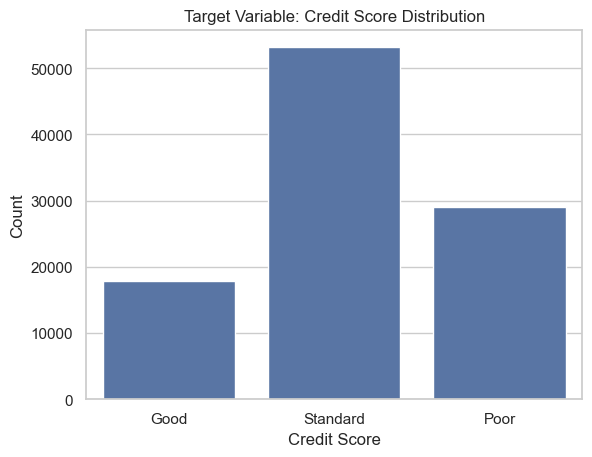

In [22]:
# Chart 3. Credit Score distribution
sns.countplot(x='Credit_Score', data=df, order=['Good', 'Standard', 'Poor'])
plt.title("Target Variable: Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

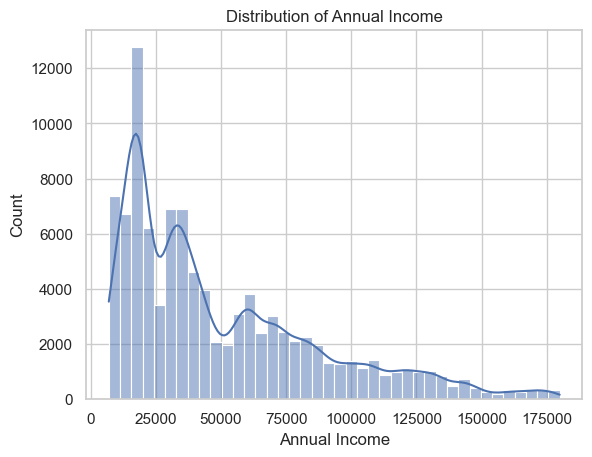

In [23]:
# Chart 4. Annual Income distribution
sns.histplot(df['Annual_Income'], kde=True, bins=40)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()


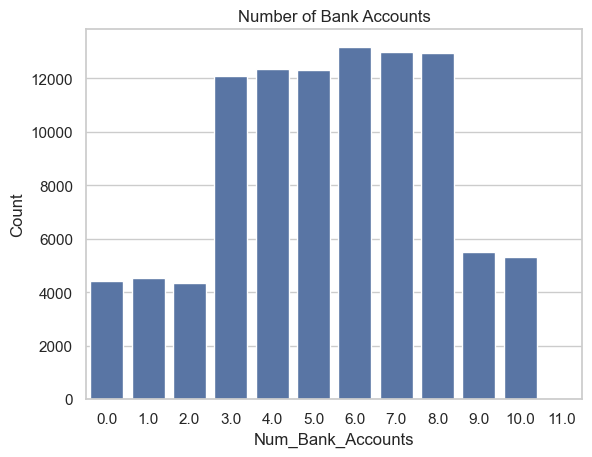

In [24]:
# Chart 5. Number of Bank Accounts
sns.countplot(x='Num_Bank_Accounts', data=df, order=sorted(df['Num_Bank_Accounts'].unique()))
plt.title("Number of Bank Accounts")
plt.xlabel("Num_Bank_Accounts")
plt.ylabel("Count")
plt.show()

In [25]:
 # Bivariate Charts

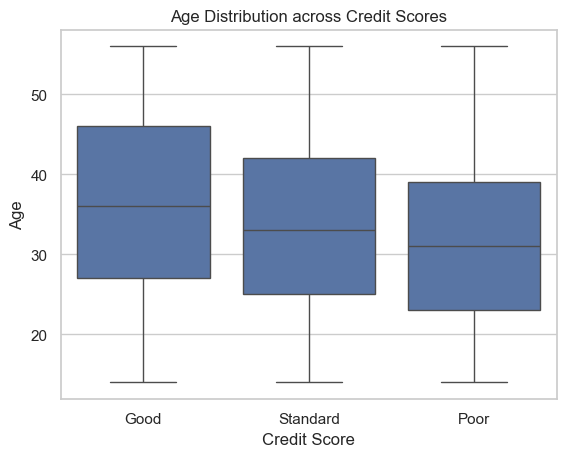

In [26]:
# Chart 6: Age vs Credit Score

sns.boxplot(x='Credit_Score', y='Age', data=df, order=['Good', 'Standard', 'Poor'])
plt.title("Age Distribution across Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Age")
plt.show()


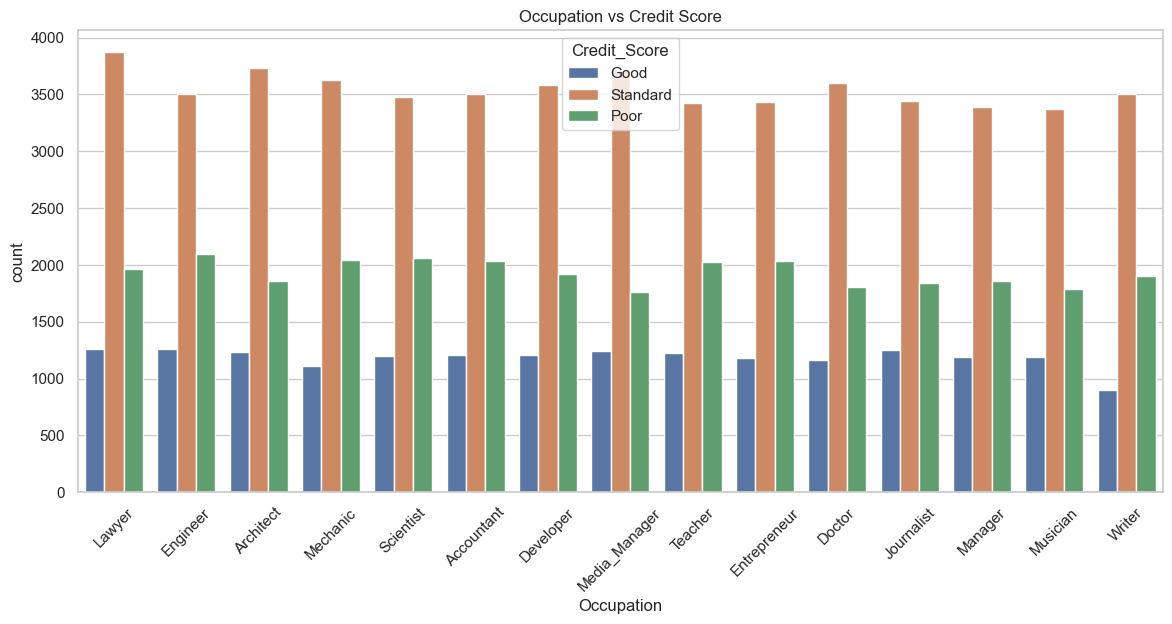

In [27]:
 # Chart 7: Occupation vs Credit Score
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Occupation', hue='Credit_Score', order=df['Occupation'].value_counts().index)
plt.title("Occupation vs Credit Score")
plt.xticks(rotation=45)
plt.show()


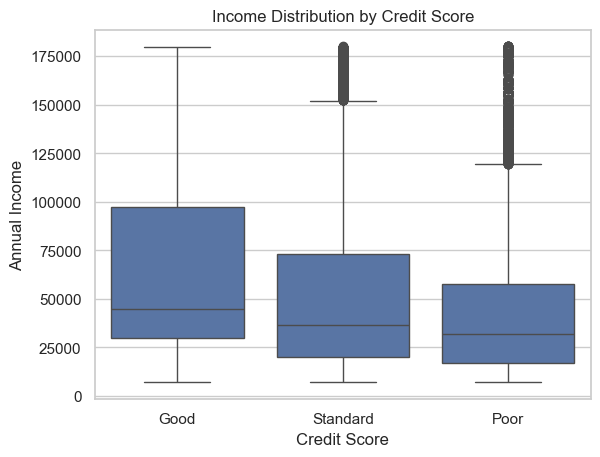

In [28]:
# Chart 8: Annual Income vs Credit Score
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, order=['Good', 'Standard', 'Poor'])
plt.title("Income Distribution by Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Annual Income")
plt.show()


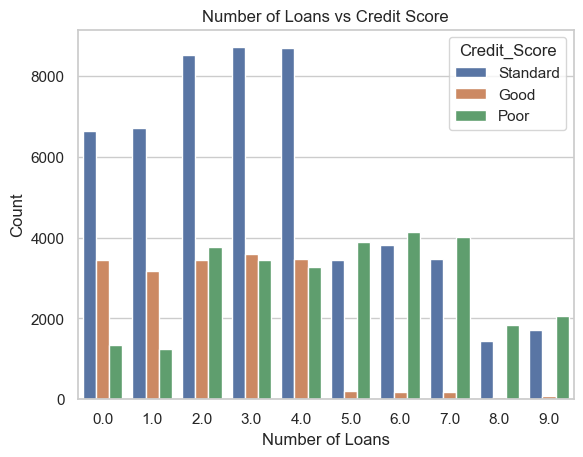

In [29]:
# Chart 9: Number of Loans vs Credit Score
sns.countplot(x='Num_of_Loan', hue='Credit_Score', data=df)
plt.title("Number of Loans vs Credit Score")
plt.xlabel("Number of Loans")
plt.ylabel("Count")
plt.show()


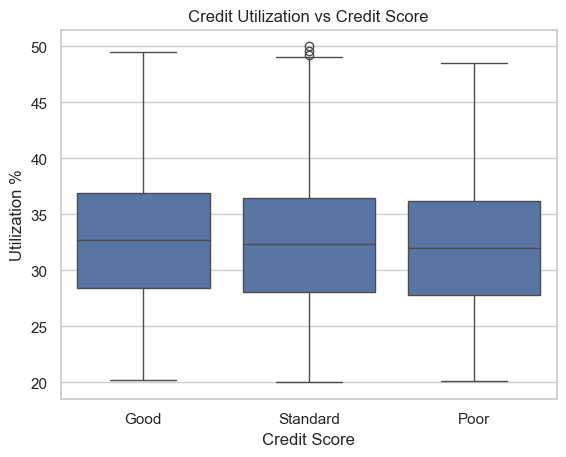

In [30]:
# Chart 10: Credit Utilization Ratio vs Credit Score
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, order=['Good', 'Standard', 'Poor'])
plt.title("Credit Utilization vs Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Utilization %")
plt.show()


In [31]:
#  Multivariate Charts

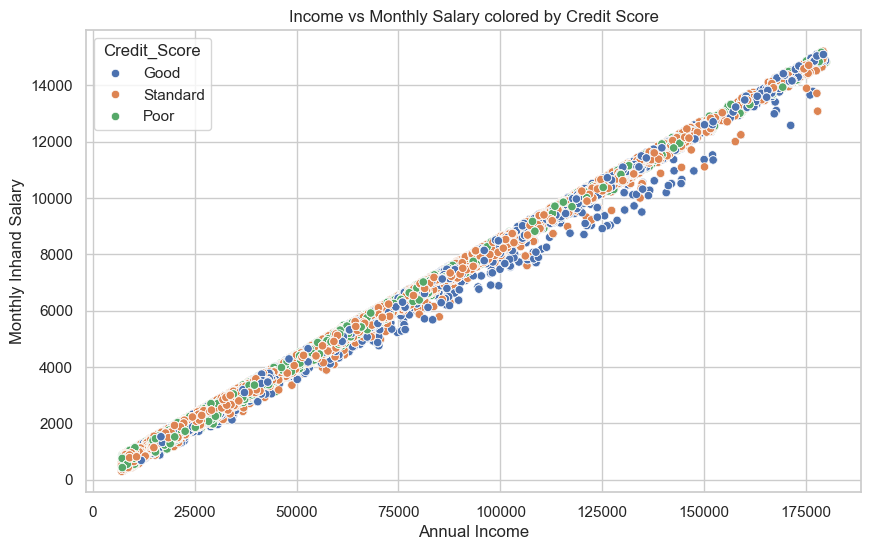

In [32]:
# Chart 11: Annual Income vs Monthly Salary by Credit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual_Income', y='Monthly_Inhand_Salary', hue='Credit_Score')
plt.title("Income vs Monthly Salary colored by Credit Score")
plt.xlabel("Annual Income")
plt.ylabel("Monthly Inhand Salary")
plt.show()


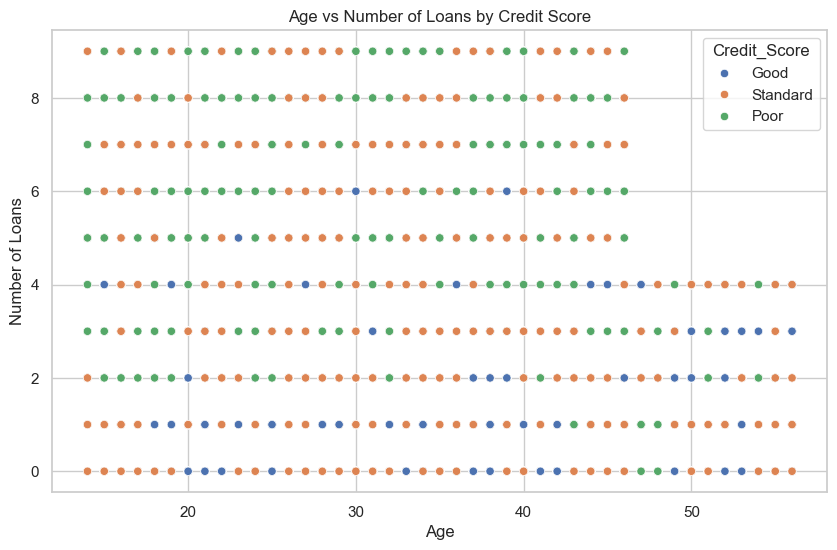

In [33]:
# Chart 12: Age vs Number of Loans by Credit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Num_of_Loan', hue='Credit_Score')
plt.title("Age vs Number of Loans by Credit Score")
plt.xlabel("Age")
plt.ylabel("Number of Loans")
plt.show()


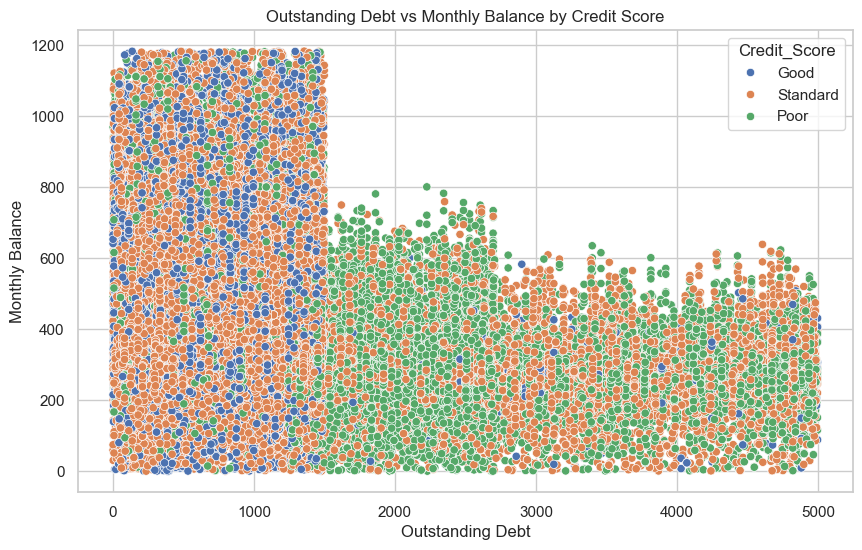

In [34]:
# Chart 13: Monthly Balance vs Outstanding Debt by Credit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Outstanding_Debt', y='Monthly_Balance', hue='Credit_Score')
plt.title("Outstanding Debt vs Monthly Balance by Credit Score")
plt.xlabel("Outstanding Debt")
plt.ylabel("Monthly Balance")
plt.show()


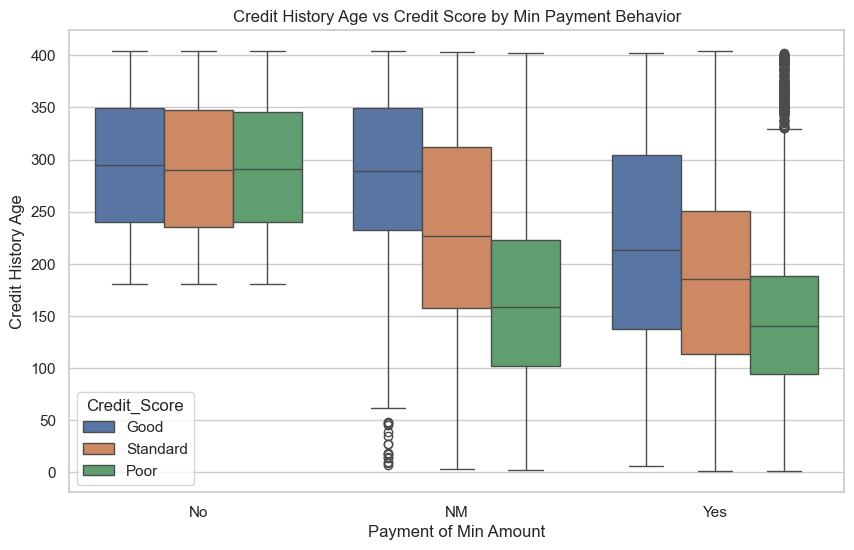

In [35]:
# Chart 14: Credit History Age vs Credit Score + Payment of Min Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Payment_of_Min_Amount', y='Credit_History_Age', hue='Credit_Score')
plt.title("Credit History Age vs Credit Score by Min Payment Behavior")
plt.xlabel("Payment of Min Amount")
plt.ylabel("Credit History Age")
plt.show()


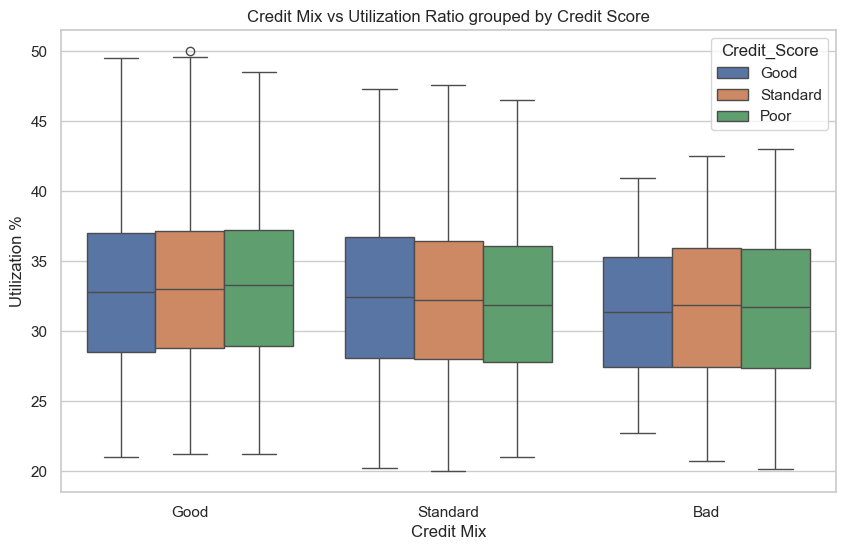

In [36]:
# Chart 15: Credit Mix vs Credit Score vs Credit Utilization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Mix', y='Credit_Utilization_Ratio', hue='Credit_Score', data=df)
plt.title("Credit Mix vs Utilization Ratio grouped by Credit Score")
plt.xlabel("Credit Mix")
plt.ylabel("Utilization %")
plt.show()


In [37]:
# Hypothesis Testing
from scipy.stats import chi2_contingency, f_oneway


# Sample down to 10,000 rows to avoidding overflow
df_sample = df.sample(n=10000, random_state=42)

# Function for Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))


In [38]:
# # Hypothesis 1: Credit Score Depends on Payment of Minimum Amount
# Statement:
# Null Hypothesis (H₀): Credit score is independent of whether the customer pays the minimum amount due.
# Alternative Hypothesis (H₁): Credit score is dependent on whether the minimum amount is paid.


# Contingency table
contingency1 = pd.crosstab(df_sample['Credit_Score'], df_sample['Payment_of_Min_Amount'])

# Chi-square test
chi2_1, p_1, dof_1, _ = chi2_contingency(contingency1)

print("Hypothesis 1: Does paying the minimum amount affect Credit Score?")
print(f"P-value: {p_1:.10f}")
print(f"Cramér's V: {cramers_v(contingency1):.4f}")

if p_1 < 0.05:
    print(" Result: REJECT the null hypothesis.")
    print(" Insight: Paying the minimum amount due is significantly associated with credit score.")
    print(" Business Impact: Regular minimum payments are strong indicators of responsible behavior and better credit score.")
else:
    print(" Result: FAIL to reject the null hypothesis.")
    print(" Insight: No significant relationship between minimum payment and credit score.")
    print(" Business Impact: Payment of minimum amount may not be a reliable indicator for credit score differentiation.")



Hypothesis 1: Does paying the minimum amount affect Credit Score?
P-value: 0.0000000000
Cramér's V: 0.3151
 Result: REJECT the null hypothesis.
 Insight: Paying the minimum amount due is significantly associated with credit score.
 Business Impact: Regular minimum payments are strong indicators of responsible behavior and better credit score.


In [39]:
# Hypothesis 2: People with Good Credit Have Lower Credit Utilization on Average
# Statement
# H₀: Mean credit utilization is the same across credit score classes.
# H₁: Mean credit utilization varies with credit score.

groups = [df_sample[df_sample['Credit_Score'] == score]['Credit_Utilization_Ratio'] for score in df_sample['Credit_Score'].unique()]
f_stat2, p_val2 = f_oneway(*groups)

print("\nHypothesis 2: Is credit utilization different across credit score groups?")
print(f"P-value: {p_val2:.10f}")

if p_val2 < 0.05:
    print(" Result: REJECT the null hypothesis.")
    print(" Insight: Credit utilization ratio significantly differs based on credit score.")
    print(" Business Impact: This feature is valuable for modeling and risk scoring—high utilization often correlates with poor credit health.")
else:
    print(" Result: FAIL to reject the null hypothesis.")
    print(" Insight: No significant difference in credit utilization across credit score classes.")
    print(" Business Impact: Utilization ratio may not be informative in this context.")



Hypothesis 2: Is credit utilization different across credit score groups?
P-value: 0.0004695682
 Result: REJECT the null hypothesis.
 Insight: Credit utilization ratio significantly differs based on credit score.
 Business Impact: This feature is valuable for modeling and risk scoring—high utilization often correlates with poor credit health.


In [41]:
#  Hypothesis 3: High Loan Count is Linked to Poor Credit Score
# Statement
# H₀: Credit score is independent of the number of loans.
# H₁: Credit score varies significantly with loan count.

# Bin number of loans
df_sample['Loan_Bin'] = pd.cut(df_sample['Num_of_Loan'], bins=[0, 2, 4, 6, 8, 10], labels=["0-2", "3-4", "5-6", "7-8", "9-10"])

# Contingency table
contingency3 = pd.crosstab(df_sample['Loan_Bin'], df_sample['Credit_Score'])

# Chi-square test
chi2_3, p_3, dof_3, _ = chi2_contingency(contingency3)

print("\nHypothesis 3: Is loan count linked with credit score?")
print(f"P-value: {p_3:.10f}")
print(f"Cramér's V: {cramers_v(contingency3):.4f}")
if p_3 < 0.05:
    print("Result: REJECT the null hypothesis.")
    print(" Insight: The number of loans significantly influences credit score.")
    print(" Business Impact: Customers with a high number of loans tend to fall into lower credit score categories. Risk teams should monitor loan volumes per user.")
else:
    print(" Result: FAIL to reject the null hypothesis.")
    print(" Insight: Loan count does not significantly vary with credit score.")
    print(" Business Impact: Number of loans might not be a key predictor of credit health.")



Hypothesis 3: Is loan count linked with credit score?
P-value: 0.0000000000
Cramér's V: 0.2657
Result: REJECT the null hypothesis.
 Insight: The number of loans significantly influences credit score.
 Business Impact: Customers with a high number of loans tend to fall into lower credit score categories. Risk teams should monitor loan volumes per user.


In [42]:
# feature engineering

In [43]:
# Treating 'No Data', 'Not Specified', 'NA', etc., as missing
placeholder_values = ['No Data', 'Not Specified', 'None', 'nan', 'NaN', 'NULL', '']

# Replacing in object columns only
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace(placeholder_values, np.nan)

In [44]:
print("Missing values after cleanup:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Missing values after cleanup:
Series([], dtype: int64)


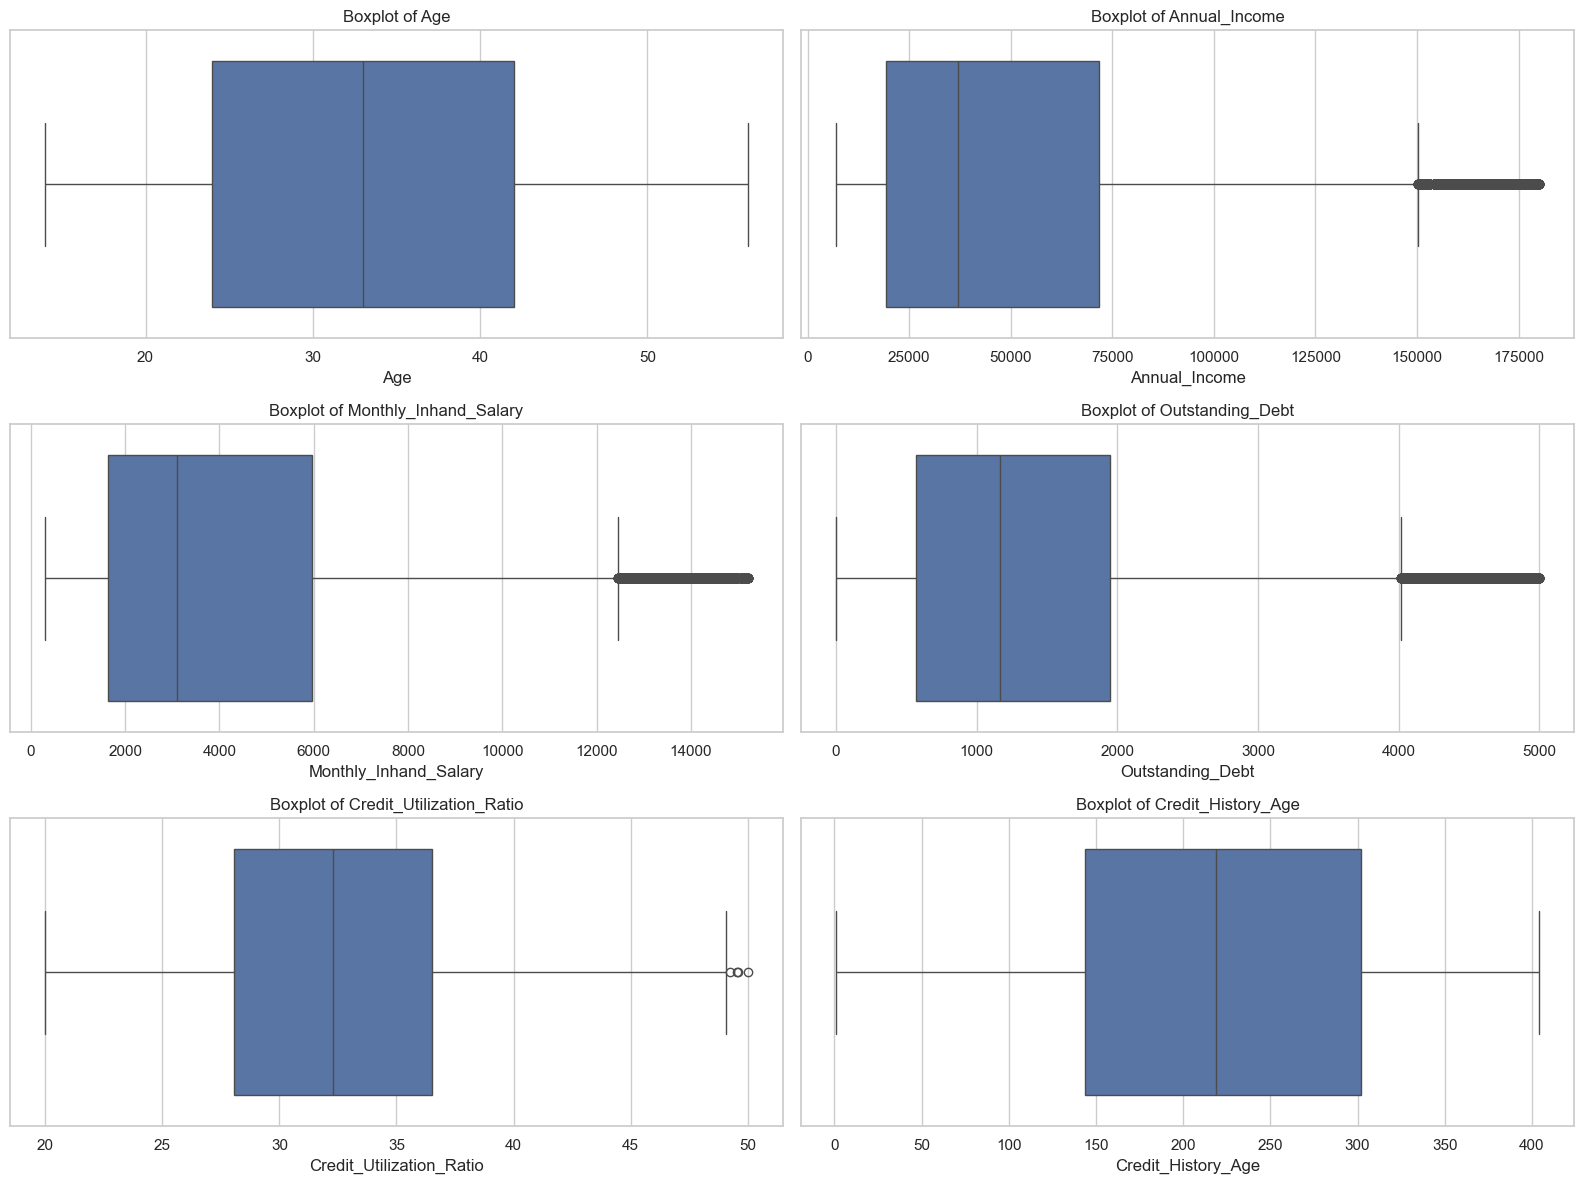

In [45]:
#  visualizing outliers with boxplots
numerical_cols = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age'
]

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [46]:
# Method to cap extreme outliers using the IQR method
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))


In [47]:
# applying to the selected features
for col in numerical_cols:
    cap_outliers(df, col)


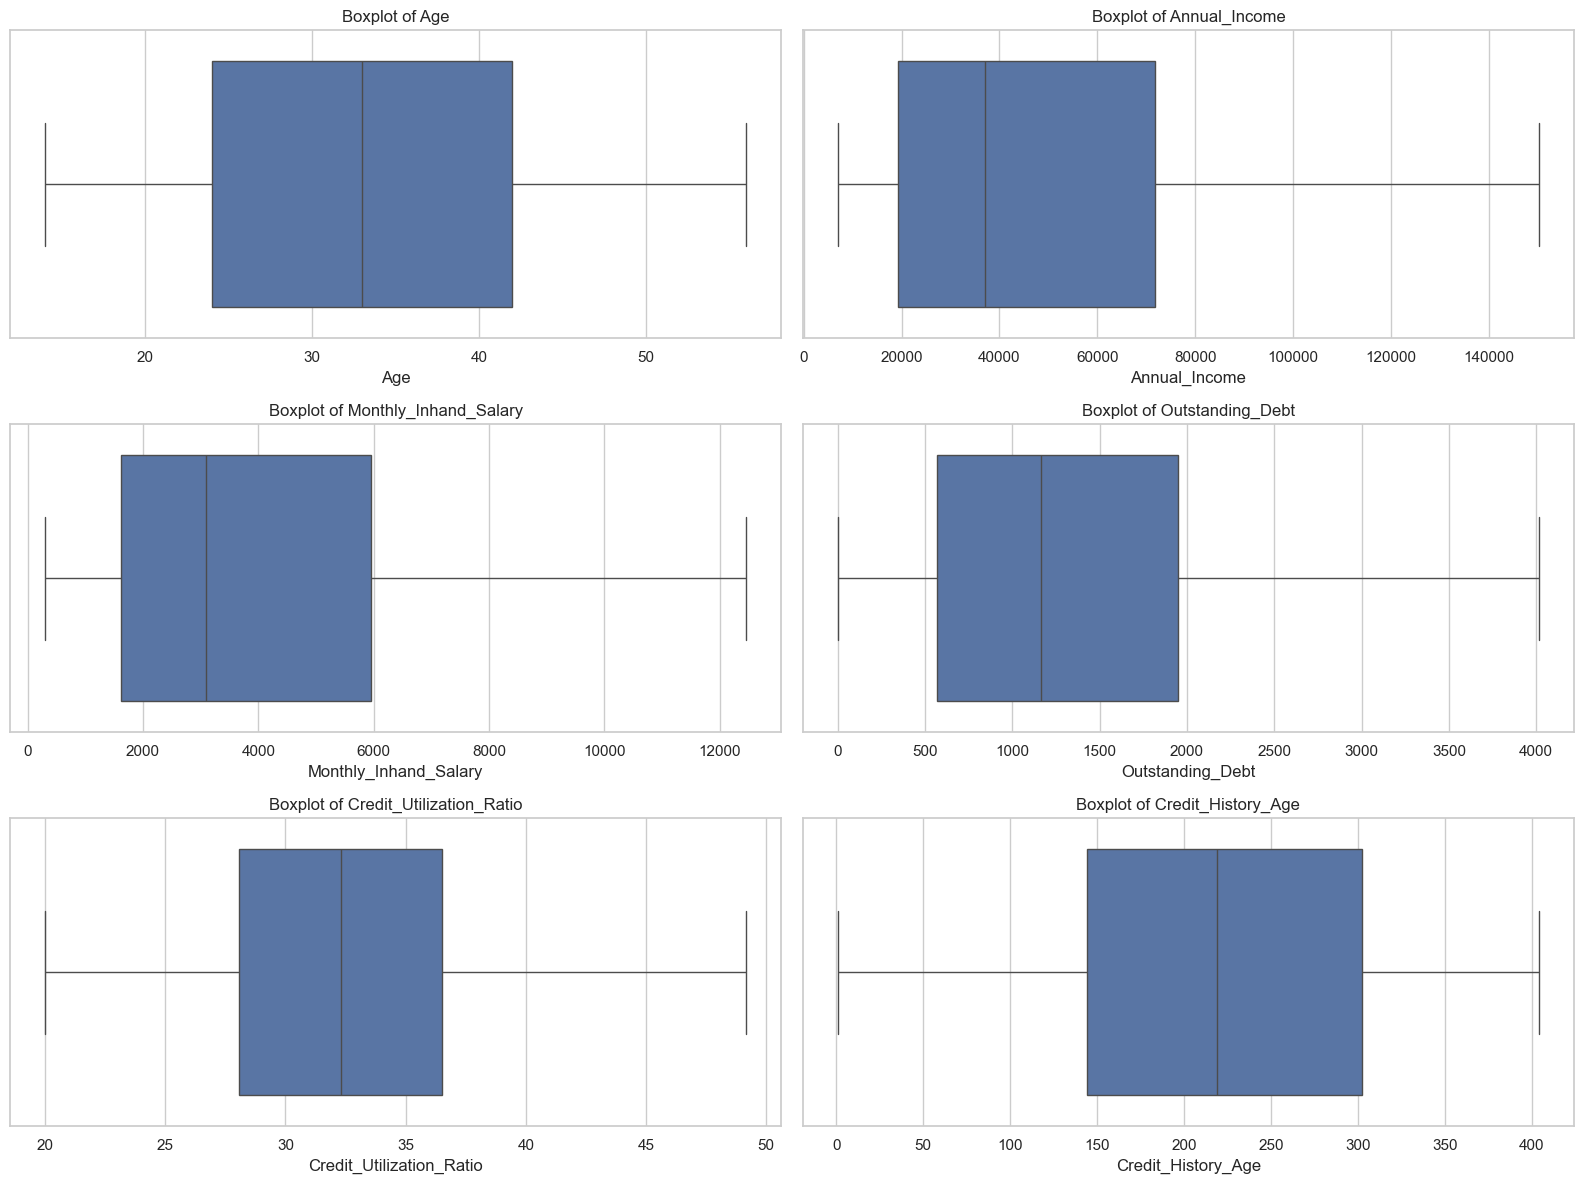

In [48]:
#  again checking via boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [49]:
# Mapping 'Poor' < 'Standard' < 'Good' 
# converting into numeric
credit_score_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df['Credit_Score'] = df['Credit_Score'].map(credit_score_map)


In [50]:
# Ordinal encoding
df['Credit_Mix'] = df['Credit_Mix'].map({'Poor': 0, 'Standard': 1, 'Good': 2})
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'No': 0, 'Yes': 1, 'NM': 2})  # NM = Not Mentioned


In [51]:
#  Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])


In [52]:
# One hot encoding for 'occupation'
df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Month                     100000 non-null  int64   
 1   Age                       100000 non-null  float64 
 2   Annual_Income             100000 non-null  float64 
 3   Monthly_Inhand_Salary     100000 non-null  float64 
 4   Num_Bank_Accounts         100000 non-null  float64 
 5   Num_Credit_Card           100000 non-null  float64 
 6   Interest_Rate             100000 non-null  float64 
 7   Num_of_Loan               100000 non-null  float64 
 8   Delay_from_due_date       100000 non-null  float64 
 9   Num_of_Delayed_Payment    100000 non-null  float64 
 10  Changed_Credit_Limit      100000 non-null  float64 
 11  Num_Credit_Inquiries      100000 non-null  float64 
 12  Credit_Mix                76232 non-null   float64 
 13  Outstanding_Debt          1000

In [54]:
print(df['Credit_History_Age'].describe())

count    100000.000000
mean        221.220460
std          99.680716
min           1.000000
25%         144.000000
50%         219.000000
75%         302.000000
max         404.000000
Name: Credit_History_Age, dtype: float64


In [55]:
#  converting to years from months for 'Credit_History_Age'
df['Credit_History_Years'] = (df['Credit_History_Age'] / 12).round(1)
df.drop('Credit_History_Age', axis=1, inplace=True)  # drop old


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Month                     100000 non-null  int64   
 1   Age                       100000 non-null  float64 
 2   Annual_Income             100000 non-null  float64 
 3   Monthly_Inhand_Salary     100000 non-null  float64 
 4   Num_Bank_Accounts         100000 non-null  float64 
 5   Num_Credit_Card           100000 non-null  float64 
 6   Interest_Rate             100000 non-null  float64 
 7   Num_of_Loan               100000 non-null  float64 
 8   Delay_from_due_date       100000 non-null  float64 
 9   Num_of_Delayed_Payment    100000 non-null  float64 
 10  Changed_Credit_Limit      100000 non-null  float64 
 11  Num_Credit_Inquiries      100000 non-null  float64 
 12  Credit_Mix                76232 non-null   float64 
 13  Outstanding_Debt          1000

In [57]:
df['Credit_History_Years']

0        22.1
1        22.2
2        22.2
3        22.3
4        22.4
         ... 
99995    31.5
99996    31.6
99997    31.7
99998    31.8
99999    31.8
Name: Credit_History_Years, Length: 100000, dtype: float64

In [58]:
#  dropping unnecessary features
df.drop([
    'Loan_Bin', 'Monthly_Balance', 'None', 'Not Specified'
], axis=1, inplace=True)


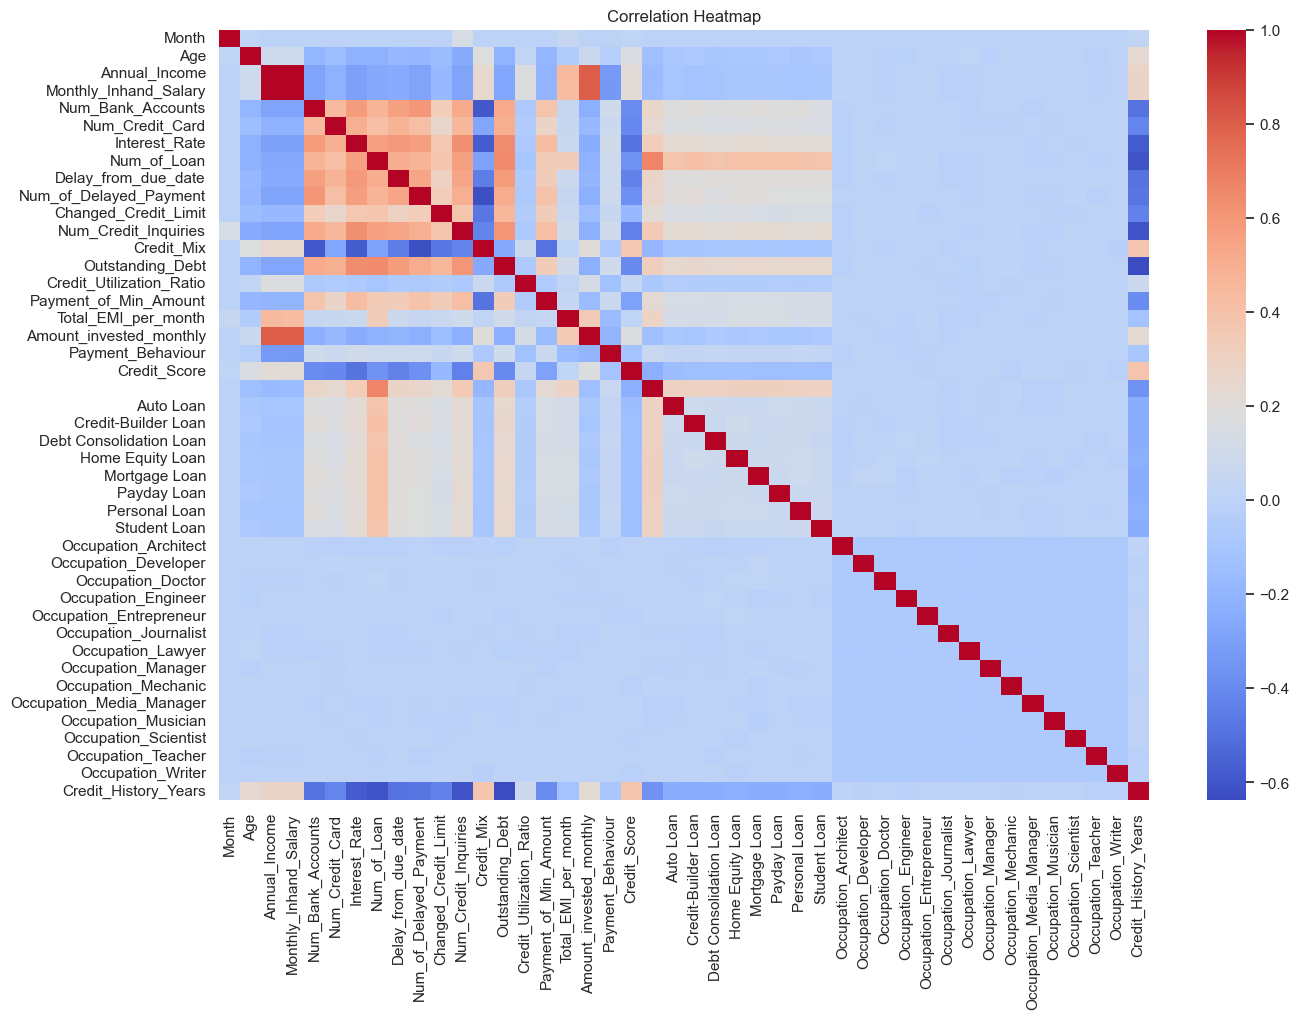

In [59]:
# correlation heatmap to check for high correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [60]:
print(f"Final shape of dataset: {df.shape}")
print("First few columns:", df.columns[:10].tolist())


Final shape of dataset: (100000, 44)
First few columns: ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment']


In [61]:
#  checking skewness
skewed_cols = df.select_dtypes(include=['float64', 'int64']).skew().sort_values(ascending=False)
print("Highly skewed features (skew > 1):\n", skewed_cols[skewed_cols > 1])


Highly skewed features (skew > 1):
 Total_EMI_per_month        4.041492
Amount_invested_monthly    1.761036
Annual_Income              1.019924
Monthly_Inhand_Salary      1.014487
dtype: float64


In [62]:
# Applying np.log1p() to positively skewed features only
cols_to_log = ['Total_EMI_per_month', 'Amount_invested_monthly', 'Annual_Income','Monthly_Inhand_Salary']

for col in cols_to_log:
    if (df[col] <= 0).any():
        print(f"Skipped log for {col} due to non-positive values.")
    else:
        df[col] = np.log1p(df[col])


Skipped log for Total_EMI_per_month due to non-positive values.
Skipped log for Amount_invested_monthly due to non-positive values.


In [63]:
#  checking again
skewed_cols = df.select_dtypes(include=['float64', 'int64']).skew().sort_values(ascending=False)
print("Highly skewed features (skew > 1):\n", skewed_cols[skewed_cols > 1])


Highly skewed features (skew > 1):
 Total_EMI_per_month        4.041492
Amount_invested_monthly    1.761036
dtype: float64


In [64]:
# Using sqrt instead of log for zero/negative-safe transformation
df['Total_EMI_per_month'] = np.sqrt(df['Total_EMI_per_month'].clip(lower=0))
df['Amount_invested_monthly'] = np.sqrt(df['Amount_invested_monthly'].clip(lower=0))


In [65]:
# final check for skewness
skewed_cols = df.select_dtypes(include=['float64', 'int64']).skew().sort_values(ascending=False)
print("Highly skewed features (skew > 1):\n", skewed_cols[skewed_cols > 1])


Highly skewed features (skew > 1):
 Series([], dtype: float64)


In [66]:
#  Identifying and then scaling features
from sklearn.preprocessing import StandardScaler

# Dropping the target
X = df.drop('Credit_Score', axis=1)

# Keeping track of target separately
y = df['Credit_Score']

# Selecting numeric columns to scale
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
cols_to_scale = [col for col in numeric_cols if X[col].nunique() > 10 and col != 'Month']

# Applying the scaler
scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


In [67]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split

# Stratify to preserve Credit_Score class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution (train):")
print(y_train.value_counts(normalize=True))


Train shape: (80000, 43)
Test shape: (20000, 43)
Target distribution (train):
Credit_Score
1    0.531737
0    0.289988
2    0.178275
Name: proportion, dtype: float64


In [68]:
missing_cols = X.isnull().sum()
print(missing_cols[missing_cols > 0])


Credit_Mix    23768
dtype: int64


In [69]:
X['Credit_Mix'].fillna(X['Credit_Mix'].mode()[0], inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_2712\604186239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Credit_Mix'].fillna(X['Credit_Mix'].mode()[0], inplace=True)


In [72]:
# Applying SMOTE only on training data to balance
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)


In [73]:
missing_cols = X.isnull().sum()
print(missing_cols[missing_cols > 0])


Series([], dtype: int64)


In [74]:
# ML Modelling

In [75]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Training the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_bal, y_train_bal)

# Predicting on test
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


=== Logistic Regression ===
Accuracy: 0.66075
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      5799
           1       0.77      0.63      0.69     10635
           2       0.51      0.78      0.62      3566

    accuracy                           0.66     20000
   macro avg       0.64      0.68      0.65     20000
weighted avg       0.68      0.66      0.66     20000



In [76]:
# Model 2: XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_bal, y_train_bal)

y_pred_xgb = xgb.predict(X_test)

print("=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


C:\Users\Dell\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:29:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
Accuracy: 0.7781
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77      5799
           1       0.83      0.76      0.79     10635
           2       0.68      0.82      0.74      3566

    accuracy                           0.78     20000
   macro avg       0.76      0.79      0.77     20000
weighted avg       0.78      0.78      0.78     20000



In [77]:
# Checking Cross-Validation Accuracy
from sklearn.model_selection import cross_val_score

log_cv = cross_val_score(logreg, X_train_bal, y_train_bal, cv=5)
xgb_cv = cross_val_score(xgb, X_train_bal, y_train_bal, cv=5)

print("LogReg CV Accuracy (mean):", log_cv.mean())
print("XGBoost CV Accuracy (mean):", xgb_cv.mean())


C:\Users\Dell\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:30:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Dell\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:30:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Dell\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:30:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Dell\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:30:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

LogReg CV Accuracy (mean): 0.7107757577947937
XGBoost CV Accuracy (mean): 0.8256665004710145


In [78]:
# Hyperparameter Tuning (XGBoost only)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
                    param_grid, cv=3, n_jobs=-1)

grid.fit(X_train_bal, y_train_bal)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

xgb_best=grid.best_estimator_


C:\Users\Dell\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:31:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Best CV Score: 0.7610036280432858


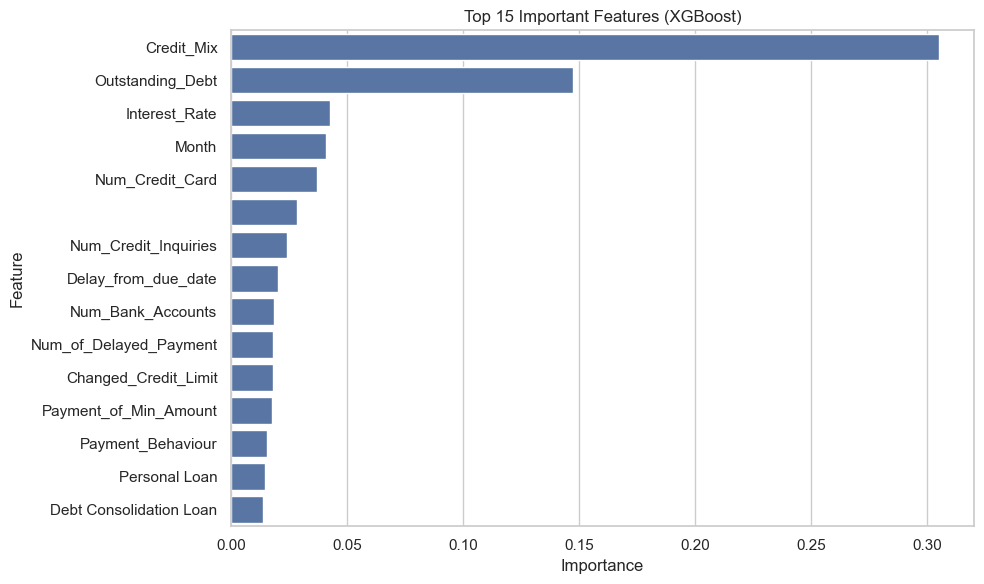

In [79]:
# Final Model Chosen: XGBoost (Tuned)
# Checking for Tree-based Feature Importance

importances = xgb_best.feature_importances_
features = X.columns

# Sorting by importance

feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting the Top 15

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title('Top 15 Important Features (XGBoost)')
plt.tight_layout()
plt.show()


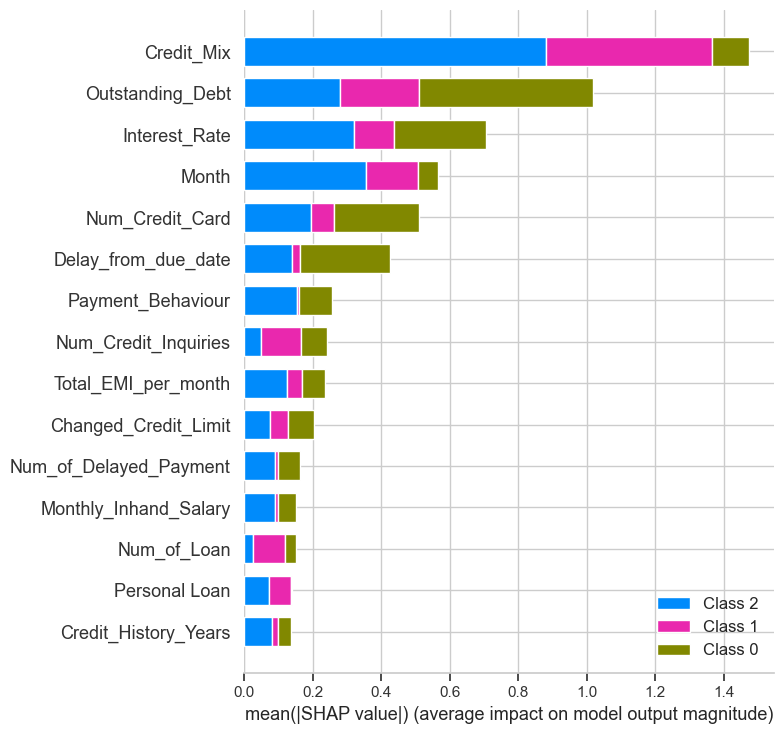

In [80]:
#  SHAP plots which give a global view of how each feature affects predictions
import shap

explainer = shap.Explainer(xgb_best)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, max_display=15)


## Conclusion

In this project, we built a complete credit score classification system using real-world financial and behavioral data. We started by understanding and cleaning the data, addressing issues like missing values, inconsistent formats, and skewed distributions. We performed exploratory data analysis and tested meaningful hypotheses to gain insights into key drivers of credit scoring.

We engineered new features from complex columns (like breaking down `Type_of_Loan`), encoded categorical variables, scaled and transformed numerical features, and balanced the data using SMOTE to ensure fair learning across all credit score categories.

Two models were trained: **Logistic Regression** as a baseline, and **XGBoost** as the primary classifier. XGBoost outperformed Logistic Regression significantly, and the final tuned model achieved around **77.59% test accuracy** and strong cross-validation performance.

Finally, we addressed the four points of the original problem statement:
- Predicted credit score category with a high-performing ML model  
- Identified key behavioral and financial features driving score prediction  
- Delivered an end-to-end notebook that is production-ready and interpretable  
- Generated actionable insights that can help lenders make smarter decisions


## Next Steps & Recommendations

While the current model performs well and provides strong insights, there are several ways this project can be extended or improved further:

- **Deploy the model via an API** using tools like FastAPI or Flask, enabling real-time prediction for loan applications.
- **Integrate a front-end dashboard** to allow analysts and decision-makers to input data and visualize results interactively.
- **Use SHAP values** for more transparent explainability at the individual prediction level (why a customer was classified as Poor, etc.).
- **Incorporate additional data** like past loan approvals, geographical info, and bank interactions to boost predictive power.
- **Set up model monitoring** for drift detection and regular retraining, especially as customer behavior changes over time.
- **Build a scoring engine** that not only predicts categories but assigns a numerical score and confidence level for each customer.

With these improvements, the model can evolve into a production-ready decision support system capable of powering smarter, faster, and more personalized credit decisions.
